### Contents

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

### **Business Problem Understanding**

**Context**
Sistem berbagi sepeda adalah generasi baru dari persewaan sepeda tradisional yang seluruh prosesnya, mulai dari keanggotaan, penyewaan, dan pengembalian, menjadi otomatis. Melalui sistem tersebut, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan kembali lagi pada posisi lain. Saat ini, terdapat sekitar lebih dari 500 program berbagi sepeda di seluruh dunia yang terdiri dari lebih dari 500 ribu sepeda. Saat ini, terdapat minat yang besar terhadap sistem ini karena peran pentingnya dalam masalah lalu lintas, lingkungan, dan kesehatan.

Terlepas dari penerapan sistem berbagi sepeda di dunia nyata yang menarik, karakteristik data yang dihasilkan oleh sistem ini menjadikannya menarik untuk penelitian. Berbeda dengan layanan transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, keberangkatan, dan posisi kedatangan dicatat secara eksplisit dalam sistem ini. Fitur ini mengubah sistem bike sharing menjadi jaringan sensor virtual yang dapat digunakan untuk mendeteksi mobilitas dalam kota. Oleh karena itu, peristiwa-peristiwa terpenting di kota tersebut diharapkan dapat dideteksi dengan memantau data ini.

**Problem Statement**
Salah satu tantangan terbesar pada bike sharing adalah overcrowding (pengguna dalam suatu tempat kesulitan menemukan sepeda yang tersedia), sehingga mempengaruhi kuantitas peminjaman sepeda harian,

overcrowding dapat terjadi karena persebaran sepeda yang tidak merata yang disebabkan oleh faktor cuaca, suhu, musim dan hari libur.
**dengan adanya overcrowding yang menyebabkan penurunan kuantitas peminjaman sepeda, maka prediksi jumlah peminjaman sepeda bulanan diperlukan**

**Goals**
Berdasarkan permasalahan tersebut, flatform bike sharing perlu memiliki 'tools' yang dapat membantu stakeholder dalam **Memprediksi total pelanggan potensial per bulan berdasarkan musim dan faktor lingkungan seperti tanggal, waktu, kelembapan, cuaca, suhu, dan hari libur** agar dapat mengurangi overcrowding.

**Analytic Approach**
Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang dapat membantu memprediksi jumlah peminjaman sepeda harian.

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu perusahaan untuk dapat menyediakan 'tool' untuk mempredikasi jumlah peminjaman sepeda harian.

**Metric Evaluation**
Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan.

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

## Data Understanding

Dataset Merupakan data yang berisi informasi mengenai bike sharing

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| dteday| Object | Tanggal|
|season|Integer|Musim 1. Musim Dingin 2. Musim Semi 3. Musim Panas 4. Musim Gugur |
| hr | Integer |Jam (0-23) |
| holiday | Integer | Hari libur atau tidak |
| temp | Float | suhu normal dalam celsius. Nilai diperoleh melalui (t-min)/(tmak-tmin), tmin=-8, t_max=+39 (hanya dalam sekala perjam) |
| atemp | Float | menormalkan suhu dalam celsius. Nilai diperoleh melalui (t-min)/(tman-tmin),  tmin=-16, t_max=+50 (hanya dalam skala per jam) |
| hum| Float | kelembapan normal. Nilainya dibagi menjadi 100 (maks) |
| casual |Integer | Jumlah Pengguna Biasa |
| Registered| Integer | Jumlah Pengguna Terdaftar |
| cnt| Integer | Hitungan total sewa sepeda termasuk sepeda biasa dan terdaftar |
| weathersit | Integer | Cuaca 1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar 4: Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut|

In [6]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [7]:
# Load dataset
df = pd.read_csv('data_bike_sharing.csv')
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


memahami bagaimana data terdistribusi

In [8]:
df.describe()

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000


pengelolaan data dan menganalisis struktur dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


Untuk melihat jumlah nilai unik dalam masing-masing kolom

In [10]:
df.apply(lambda x: len(x.unique()))

dteday        731
hum            89
weathersit      4
holiday         2
season          4
atemp          65
temp           50
hr             24
casual        305
registered    742
cnt           830
dtype: int64

Distribution Of Jumlah Pengguna (cnt)

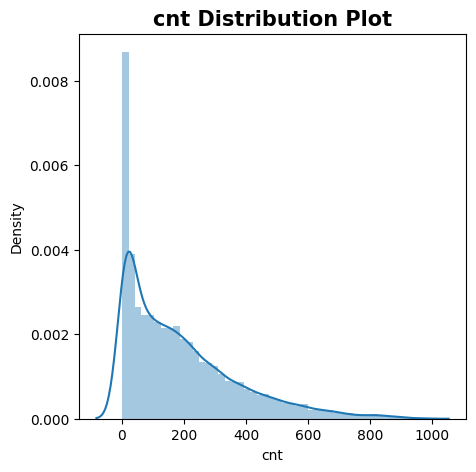

In [11]:
# Plot distribusi fitur 'cnt'
plt.figure(figsize=(5, 5))
sns.distplot(df['cnt'])
plt.title('cnt Distribution Plot', size=15, weight='bold');

Berdasarkan plot distribusi cnt di atas, terlihat bahwa terdapat 'right-skewed distribution'. Dengan kata lain, terdapat skewness positif pada fitur cnt.

In [12]:
# Grouping hari libur berdasarkan season
df.groupby(['season', 'holiday'])['holiday'].count()

season  holiday
1       0          2905
        1           118
2       0          3008
        1            66
3       0          3093
        1            76
4       0          2797
        1           102
Name: holiday, dtype: int64

In [13]:
# Cek median cnt untuk tiap season
df_median_cnt = df.groupby(by=['season']).agg({'cnt':'median'}).reset_index()
df_median_cnt = df_median_cnt.set_index('season')
df_median_cnt = df_median_cnt.sort_values('cnt', ascending =False)
df_median_cnt.head()

,cnt
season,
3,198.0
2,165.5
4,155.0
1,76.0


from matplotlib import pyplot as plt
_df_0['cnt'].plot(kind='hist', bins=20, title='cnt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['cnt'].plot(kind='line', figsize=(8, 4), title='cnt')
plt.gca().spines[['top', 'right']].set_visible(False)

In [14]:
# Cek median cnt untuk tiap holiday
df_median_cnt = df.groupby(by=['holiday']).agg({'cnt':'median'}).reset_index()
df_median_cnt = df_median_cnt.set_index('holiday')
df_median_cnt = df_median_cnt.sort_values('cnt', ascending =False)
df_median_cnt.head()

,cnt
holiday,
0,144.0
1,97.5


from matplotlib import pyplot as plt
_df_2['cnt'].plot(kind='hist', bins=20, title='cnt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['cnt'].plot(kind='line', figsize=(8, 4), title='cnt')
plt.gca().spines[['top', 'right']].set_visible(False)

holiday,0,1
season,,
1,77.0,46.5
2,166.0,160.0
3,198.0,245.5
4,156.0,110.5


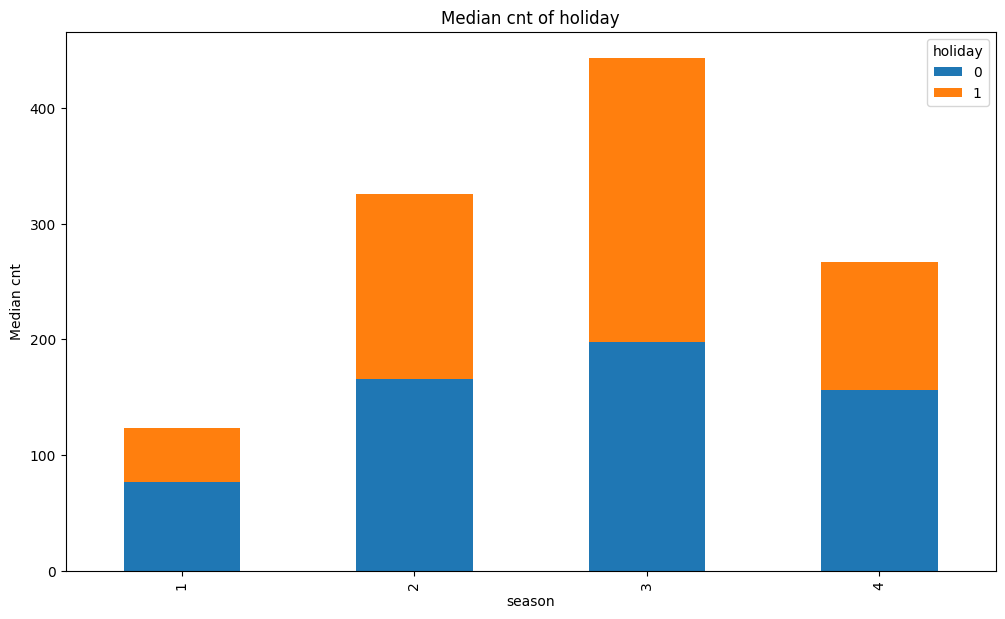

In [15]:
# Plot cnt median untuk tiap holiday di setiap season
from IPython.display import display

season_pivot = df.pivot_table(index='season', columns='holiday', values='cnt', aggfunc='median')
display(season_pivot)

pivot_plot = season_pivot.plot.bar(stacked=True, figsize=(12, 7))
pivot_plot.set_xlabel('season')
pivot_plot.set_ylabel('Median cnt')
pivot_plot.set_title('Median cnt of holiday');

 season 3 (Musim Panas) memiliki cnt median tertinggi pada hari libur maupun tidak

## Data Preprocessing

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [16]:
df_model = df.copy()

In [17]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                    data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,dteday,object,0,0.0,731,"[2011-05-17, 2011-04-08]"
1,hum,float64,0,0.0,89,"[0.88, 0.47]"
2,weathersit,int64,0,0.0,4,"[2, 4]"
3,holiday,int64,0,0.0,2,"[0, 1]"
4,season,int64,0,0.0,4,"[2, 1]"
5,atemp,float64,0,0.0,65,"[0.697, 0.2576]"
6,temp,float64,0,0.0,50,"[0.4, 0.76]"
7,hr,int64,0,0.0,24,"[20, 6]"
8,casual,int64,0,0.0,305,"[246, 290]"
9,registered,int64,0,0.0,742,"[596, 701]"


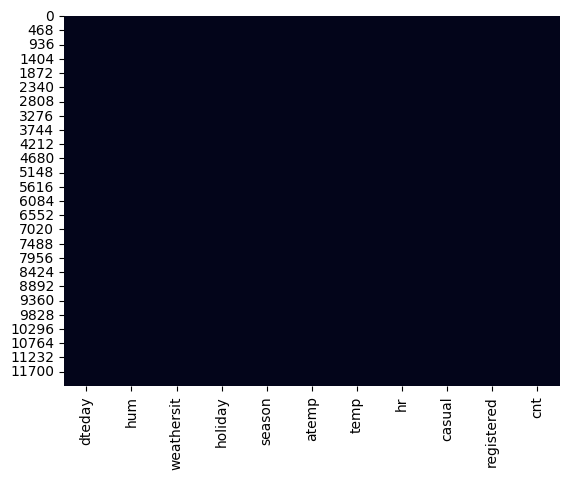

In [18]:
# Missing value heatmap
sns.heatmap(df_model.isnull(), cbar=False);

In [19]:
# Cek data duplikat
df_model.duplicated().sum()

0

In [20]:
df_model = df_model.rename(columns={'weathersit':'weather',
                        'yr':'year',
                        'mnth':'month',
                        'hr':'hour',
                        'hum':'humidity',
                        'cnt':'count'})
df_model.head()

,dteday,humidity,weather,holiday,season,atemp,temp,hour,casual,registered,count
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


In [171]:
df_model['dteday'] = pd.to_datetime(df['dteday'])
df_model['month'] = df_model['dteday'].dt.month
df_model['year'] = df_model['dteday'].dt.year
df_model['dayName']= df_model['dteday'].dt.strftime('%A')
dayMapper = {'Monday' : 1,
             'Tuesday' : 2,
             'Wednesday' : 3,
             'Thursday' : 4,
             'Friday' : 5,
             'Saturday' : 6,
             'Sunday' : 7}
df_model['dayName'] = df_model['dayName'].map(dayMapper)
df_model


,dteday,humidity,weather,holiday,season,atemp,temp,hour,casual,registered,count,month,year,dayDate,dayName
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250,12,2011,9,5
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18,6,2012,17,7
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107,6,2011,15,3
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145,3,2012,31,6
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857,7,2012,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257,1,2012,25,3
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102,7,2012,6,5
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6,2,2012,20,1
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69,3,2012,31,6


0        12
1         6
2         6
3         3
4         7
         ..
12160     1
12161     7
12162     2
12163     3
12164     4
Name: dteday, Length: 12165, dtype: int64

([<matplotlib.axis.XTick at 0x7cbcdbc03f70>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

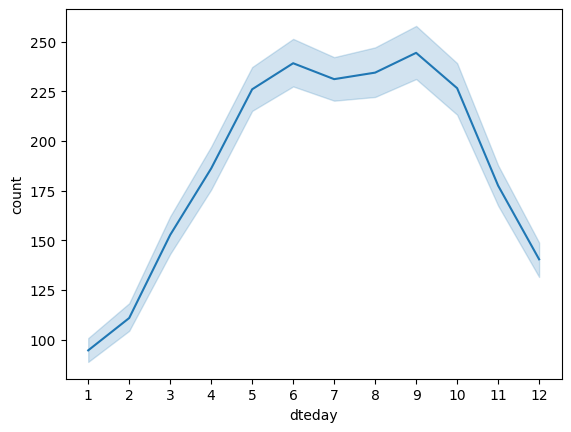

In [22]:
month = df_model['dteday'].dt.month

display(month)
sns.lineplot(data=df_model,
            x= month,
            y='count')
plt.xticks(ticks=np.sort(month.unique()))

Grafik di atas menunjukkan jumlah total pelanggan per bulan. Seperti yang bisa kita lihat di atas, ada pola yang menunjukkan bagaimana bulan dalam satu tahun (dipengaruhi oleh musim) dapat memengaruhi jumlah total pelanggan.
Artinya bulan dapat menjadi variabel potensial untuk menentukan jumlah total pelanggan.

0        4
1        2
2        2
3        2
4        3
        ..
12160    1
12161    3
12162    1
12163    2
12164    2
Name: season, Length: 12165, dtype: int64

([<matplotlib.axis.XTick at 0x7cbcdbbdafe0>,
 [Text(3.0, 0, 'Musim Dingin'),
  Text(0.0, 0, 'Musim Gugur'),
  Text(2.0, 0, 'Musim Panas'),
  Text(1.0, 0, 'Musim Semi')])

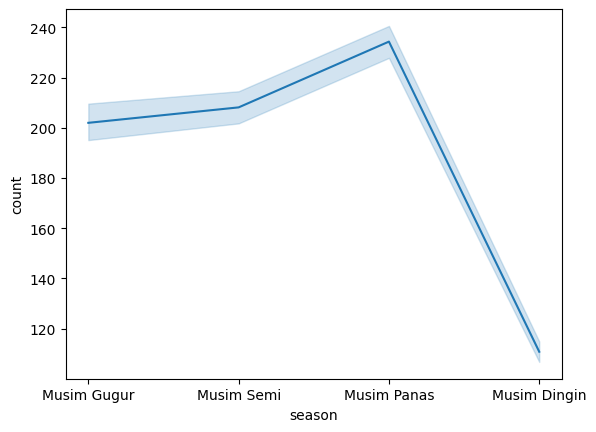

In [23]:
SeasonName = df_model['season']
display(SeasonName)
SeasonMapper = {1:'Musim Dingin' ,
                2:'Musim Semi' ,
                3:'Musim Panas',
                4:'Musim Gugur' }

SeasonName = SeasonName.map(SeasonMapper)
sns.lineplot(data=df_model,
            x=SeasonName,
            y='count')
plt.xticks(ticks=np.sort(SeasonName.unique()))

Grafik di atas adalah tentang jumlah pelanggan per musim. Seperti yang bisa kita lihat di atas, ada beberapa pola yang dapat membantu model menentukan total pelanggan.
Kami berpotensi menggunakan variabel ini untuk menentukan jumlah total pelanggan.

dari grafik diatas dapat dilihat bahwa musim panas memiliki nilai count paling tinggi daripada musim lainnya, musim panas yang terjadi di bulan juni-agustus, lalu disusul musim gugur pada bulan september-november, karena waktu perubahan musim di setiap negara pada belahan dunia berbeda, maka grafik ini hanya mewakili negara dengan musim panas yang terjadi apda bulan juni-agustus dan disusul musim gugur pada september-november

In [24]:
df_model[df_model['month'] == 12].sort_values('season')['season'].value_counts()

4    645
1    376
Name: season, dtype: int64

<Axes: xlabel='year', ylabel='count'>

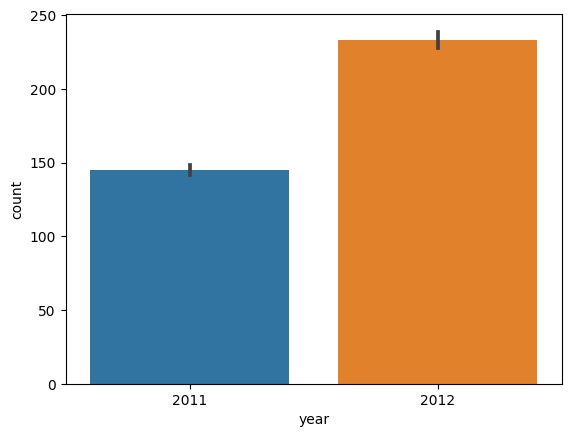

In [25]:
sns.barplot(data=df_model,
            x='year',
            y='count')

Grafik di atas adalah tentang total pelanggan per tahun.
Kedua tahun tersebut memiliki perbedaan yang jelas, artinya tahun dapat menjadi variabel potensial untuk menentukan jumlah pelanggan dalam model nantinya.

<Axes: xlabel='weather', ylabel='count'>

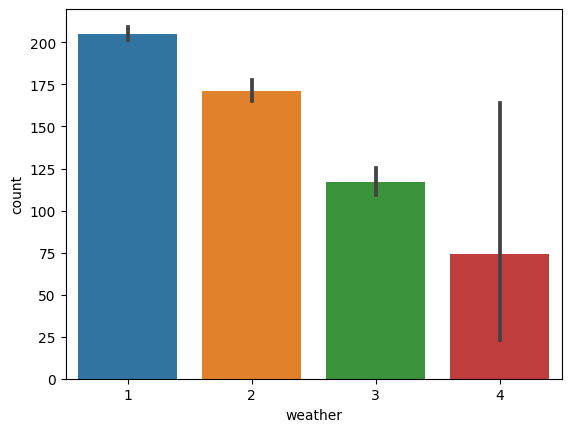

In [26]:
sns.barplot(data=df_model,
            x='weather',
            y='count')


Grafik di atas menunjukkan total pelanggan per cuaca.
Mereka memiliki perbedaan yang jelas jika dibandingkan dengan total pelanggan.
Artinya, cuaca juga berpotensi digunakan sebagai variabel untuk menentukan jumlah pelanggan

In [27]:
df_model['weather'].value_counts()

1    8071
2    3119
3     972
4       3
Name: weather, dtype: int64

In [28]:
df_model.loc[df_model['weather'] == 4,'weather'] = 3
df_model['weather'].value_counts()

1    8071
2    3119
3     975
Name: weather, dtype: int64


Nilai pada cuaca '4' yang kecil (hanya 3 baris) membuat mean pada grafik di atas tersebar luas.
Kita bisa menggabungkannya menjadi cuaca '3' seperti arti dari cuaca '3' (Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar) dan '4' (Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut) dapat dikategorikan sebagai hari hujan.

<Axes: xlabel='holiday', ylabel='count'>

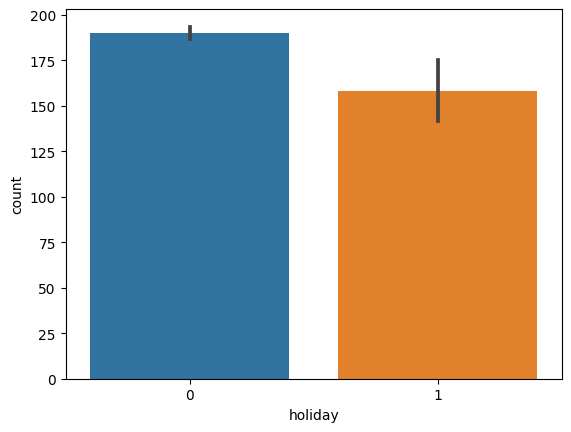

In [29]:
sns.barplot(data=df_model,
            x='holiday',
            y='count')

Grafik di atas menunjukkan total pelanggan per status hari libur (0=hari kerja,1= hari libur).
Hanya ada sedikit perbedaan nilai antara 2 statistik tersebut.
Kolom ini masih dapat digunakan untuk membantu model belajar, namun dampaknya kecil.

Outliers Detection

Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, di antaranya adalah dengan mempertimbangkan sisi domain knowledge.

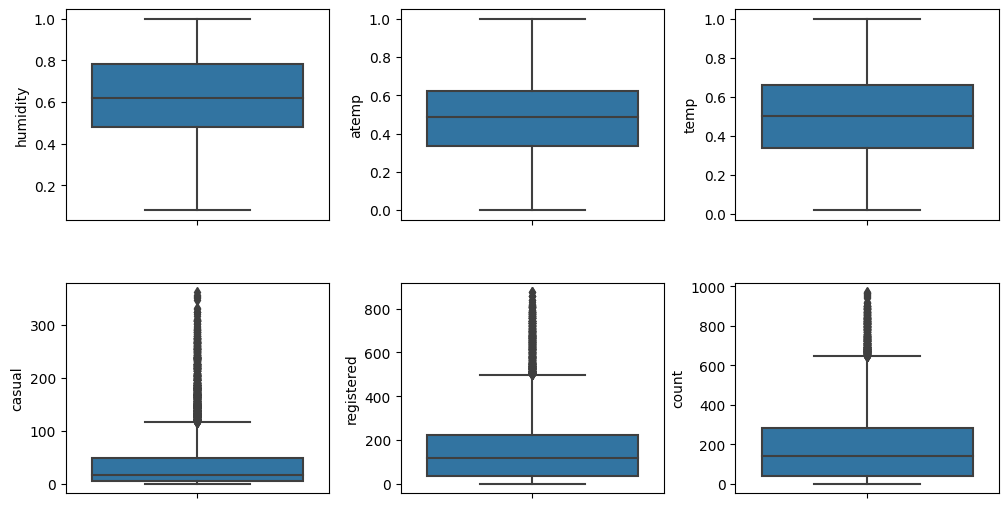

In [51]:
numericCols = df_model.drop(['month','weather','holiday','season','hour'],axis=1).select_dtypes(include=[float, int]).columns

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(10,5))
index = 0
ax = ax.flatten()

for col in numericCols:
    sns.boxplot(y=col, data=df_model, ax=ax[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=4.0)
plt.show()

Kita dapat melihat bahwa kelembapan memiliki beberapa nilai outlier. 0 kelembaban. Tampaknya ini sebuah anomali, karena cuaca akan sangat kering dan harus berada dalam lingkungan yang terkendali. Jadi, kita harus mengeluarkan data tersebut.

0.48

0.78

0.30000000000000004

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12151 entries, 0 to 12164
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12151 non-null  datetime64[ns]
 1   humidity    12151 non-null  float64       
 2   weather     12151 non-null  category      
 3   holiday     12151 non-null  category      
 4   season      12151 non-null  category      
 5   atemp       12151 non-null  float64       
 6   temp        12151 non-null  float64       
 7   hour        12151 non-null  category      
 8   casual      12151 non-null  int64         
 9   registered  12151 non-null  int64         
 10  count       12151 non-null  int64         
 11  month       12151 non-null  category      
 12  year        12151 non-null  category      
 13  dayDate     12151 non-null  category      
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 845.5 KB


,dteday,humidity,weather,holiday,season,atemp,temp,hour,casual,registered,count,month,year,dayDate


Int64Index([], dtype='int64')

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12151 entries, 0 to 12164
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12151 non-null  datetime64[ns]
 1   humidity    12151 non-null  float64       
 2   weather     12151 non-null  category      
 3   holiday     12151 non-null  category      
 4   season      12151 non-null  category      
 5   atemp       12151 non-null  float64       
 6   temp        12151 non-null  float64       
 7   hour        12151 non-null  category      
 8   casual      12151 non-null  int64         
 9   registered  12151 non-null  int64         
 10  count       12151 non-null  int64         
 11  month       12151 non-null  category      
 12  year        12151 non-null  category      
 13  dayDate     12151 non-null  category      
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 845.5 KB


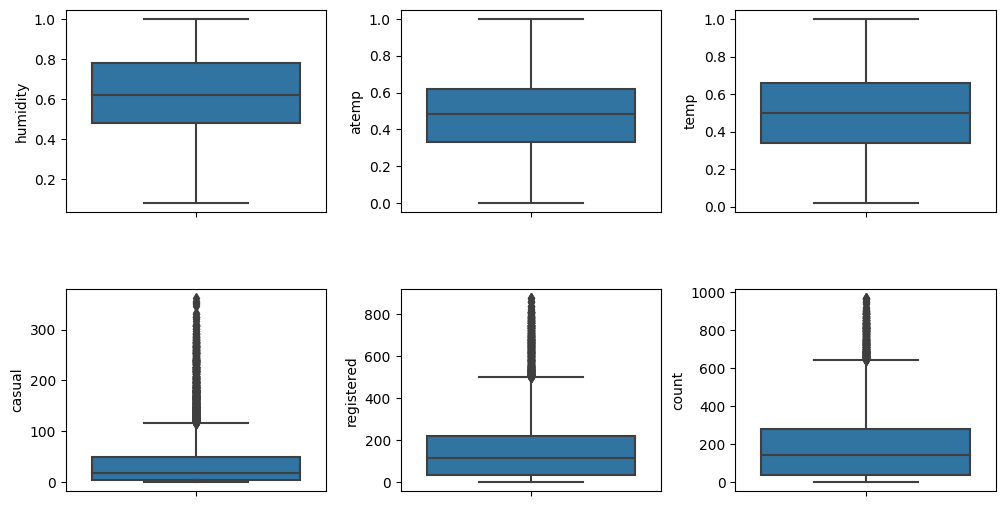

None

None

In [52]:
Q1count = df_model['humidity'].quantile(0.25)
Q3count = df_model['humidity'].quantile(0.75)
IQRcount = Q3count - Q1count
display(Q1count,Q3count,IQRcount)

outlierscount = df_model[(df_model['humidity'] < Q1count - 1.5 * IQRcount) | (df_model['humidity'] > Q3count + 1.5 * IQRcount)]
display(outlierscount,
        outlierscount.index,
        df_model.info())
df_model = df_model.drop(outlierscount.index)

numericCols = df_model.drop(['month','weather','holiday','season','hour'],axis=1).select_dtypes(include=[float, int]).columns

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(10,5))
index = 0
ax = ax.flatten()

for col in numericCols:
    sns.boxplot(y=col, data=df_model, ax=ax[index])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
display(df_model.info(),
        plt.show())

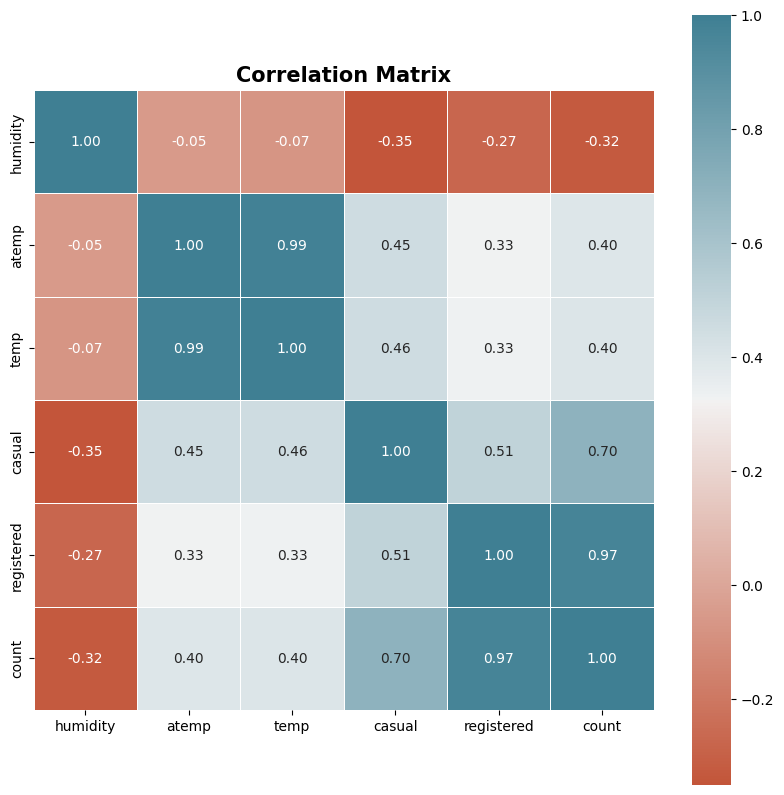

In [54]:
# Correlation matrix
plt.figure(figsize=(10, 10))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_model.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')
plt.show()

Seperti yang terlihat di atas, temp dan atemp bersifat multikolinear (artinya sama, tujuannya sama), jadi kita bisa memilih salah satunya,
Registered dan casual juga secara langsung menentukan jumlah total pelanggan.

In [183]:
df_model['holiday'] = df_model['holiday'].astype('category')
df_model['weather'] = df_model['weather'].astype('category')
df_model['month'] = df_model['month'].astype('category')
df_model['hour'] = df_model['hour'].astype('category')
df_model['dayDate'] = df_model['dayDate'].astype('category')
df_model['season'] = df_model['season'].astype('category')
df_model['year'] = df_model['year'].astype('category')
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12151 entries, 0 to 12164
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12151 non-null  datetime64[ns]
 1   humidity    12151 non-null  float64       
 2   weather     12151 non-null  category      
 3   holiday     12151 non-null  category      
 4   season      12151 non-null  category      
 5   atemp       12151 non-null  float64       
 6   temp        12151 non-null  float64       
 7   hour        12151 non-null  category      
 8   casual      12151 non-null  int64         
 9   registered  12151 non-null  int64         
 10  count       12151 non-null  int64         
 11  month       12151 non-null  category      
 12  year        12151 non-null  category      
 13  dayDate     12151 non-null  category      
 14  dayName     12151 non-null  int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(4)
memory usage: 

In [36]:
df_model

,dteday,humidity,weather,holiday,season,atemp,temp,hour,casual,registered,count,month,year,dayDate
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250,12,2011,9
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18,6,2012,17
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107,6,2011,15
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145,3,2012,31
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857,7,2012,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257,1,2012,25
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102,7,2012,6
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6,2,2012,20
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69,3,2012,31


## Modeling

**Daftar Model Potensial**

In [94]:

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

Pertama, mengimpor model potensial untuk dilatih dari model regresi.
kita akan menggunakan 9 model awal yang berbeda untuk dilatih.

**Penjelasan singkat model**

**Regresi Linier (Linear Regression):**
Jenis: Supervised Learning
Tujuan: Memprediksi nilai variabel target berkelanjutan berdasarkan hubungan linier dengan fitur-fitur lain.
Kelebihan: Sederhana, mudah diinterpretasi.
Kegunaan: Peramalan harga saham, prediksi penjualan, dll.

**K-Nearest Neighbors (K-NN):**
Jenis: Supervised Learning (klasifikasi), Unsupervised Learning (klastering)
Tujuan: Menentukan label kelas berdasarkan mayoritas tetangga terdekat dalam ruang fitur.
Kelebihan: Mudah dipahami, cocok untuk data berdimensi tinggi.
Kegunaan: Klasifikasi, klastering, rekomendasi.

**Pohon Keputusan (Decision Trees):**
Jenis: Supervised Learning
Tujuan: Membagi data menjadi subset berdasarkan aturan keputusan hingga mencapai prediksi.
Kelebihan: Mudah dipahami, tidak memerlukan banyak preprocessing.
Kegunaan: Klasifikasi, regresi, analisis keputusan.

**SVR (Support Vector Regression):**
Jenis: Model regresi.
Tujuan: Memprediksi nilai berkelanjutan dengan mencari hiperbidang pemisah yang memaksimalkan margin antara poin data dan garis regresi.
Kekurangan: Memerlukan penyesuaian parameter yang tepat, sensitif terhadap skala data, dan dapat memerlukan waktu komputasi yang lama untuk data besar.
Kegunaan: Prediksi harga saham, suhu, regresi non-linier.

**Random Forest:**
Jenis: Ensemble Learning (kombinasi dari pohon keputusan)
Tujuan: Membangun beberapa pohon keputusan dan menggabungkan hasil prediksi mereka.
Kelebihan: Mengurangi overfitting, kinerja yang baik.
Kegunaan: Klasifikasi, regresi, deteksi anomali.

**XGBoost:**
Jenis: Ensemble Learning (Boosting)
Tujuan: Membangun banyak pohon keputusan dengan peningkatan bobot kesalahan.
Kelebihan: Kinerja tinggi, mengatasi overfitting.
Kegunaan: Klasifikasi, regresi, peringkat.

**Ridge Regression:**
Jenis: Model regresi.
Tujuan: Mengatasi overfitting dalam regresi linier dengan menambahkan norma L2 ke fungsi kerugian.
Kekurangan: Tidak melakukan seleksi fitur secara otomatis dan hanya mencegah parameter menjadi terlalu besar.
Kegunaan: Regresi dengan banyak fitur, mengurangi efek variabel yang berkorelasi.

**Lasso Regression:**
Jenis: Model regresi.
Tujuan: Mengatasi overfitting dan seleksi fitur dalam regresi dengan menambahkan norma L1 ke fungsi kerugian.
Kekurangan: Bisa menyebabkan beberapa parameter menjadi nol, yang dapat menghilangkan fitur dari model.
Kegunaan: Seleksi fitur, mengurangi dimensi data, regresi dengan data yang memiliki banyak fitur.

**Gradient Boosting Regressor:**
Jenis: Model regresi yang menggunakan teknik ensemble learning.
Tujuan: Membangun serangkaian pohon keputusan dan menggabungkan hasil prediksi mereka untuk meningkatkan akurasi.
Kekurangan: Dapat rentan terhadap overfitting jika tidak ada penyetelan parameter yang tepat.
Kegunaan: Prediksi berkualitas tinggi untuk regresi, terutama ketika ada non-linearitas dan interaksi antar fitur.



In [95]:
linreg = LinearRegression()
knnreg = KNeighborsRegressor()
treereg = DecisionTreeRegressor()
svreg = SVR()
rfreg = RandomForestRegressor()
xgbreg = XGBRegressor()
ridgereg = Ridge()
lassoreg = Lasso()
gradientreg = GradientBoostingRegressor()
normalModel = [linreg,knnreg,treereg,svreg,rfreg,xgbreg,ridgereg,lassoreg,gradientreg]
normalModelName = ['linreg','knnreg','treereg','svreg','rfreg','xgbreg','ridgereg','lassoreg','gradientreg']

In [96]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [172]:
encoderOHE = OneHotEncoder()
transformer = ColumnTransformer([('encodingOHE',encoderOHE,['weather','season','dayName'])],
                                remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('encodingOHE', OneHotEncoder(),
                                 ['weather', 'season', 'dayName'])])

OneHotEncoder():
OneHotEncoder mengubah variabel kategori menjadi representasi biner, membuat kolom biner untuk setiap kategori. Hal ini berguna ketika bekerja dengan fitur kategoris yang tidak memiliki urutan atau hierarki yang melekat. 2. ColumnTransformer(): ColumnTransformer memungkinkan penerapan transformasi berbeda ke kolom atau subkumpulan kolom berbeda dalam kumpulan data. Ini berguna ketika Anda memiliki gabungan fitur numerik dan kategorikal, memungkinkan transformasi spesifik untuk setiap jenis fitur dalam satu langkah.

**Test Data Split**

In [173]:
from sklearn.model_selection import train_test_split

In [192]:
x_model = df_model.drop(['count','registered','casual','dteday','atemp'],axis = 1)
y_model = df_model['count']

x_train, x_test, y_train, y_test = train_test_split(x_model,
                                                    y_model,
                                                    random_state = 99,
                                                    test_size = 0.2)
display(df_model,
        x_train,
        x_test,
        y_train,
        y_test)

,dteday,humidity,weather,holiday,season,atemp,temp,hour,casual,registered,count,month,year,dayDate,dayName
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250,12,2011,9,5
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18,6,2012,17,7
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107,6,2011,15,3
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145,3,2012,31,6
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857,7,2012,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257,1,2012,25,3
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102,7,2012,6,5
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6,2,2012,20,1
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69,3,2012,31,6


,humidity,weather,holiday,season,temp,hour,month,year,dayDate,dayName
7756,0.74,1,0,3,0.70,2,8,2011,1,1
3523,0.50,1,0,1,0.40,23,3,2012,11,7
1251,0.49,1,0,3,0.82,15,7,2012,24,2
11777,0.51,1,0,3,0.74,20,7,2012,11,3
10850,0.30,1,0,3,0.86,15,8,2012,17,5
...,...,...,...,...,...,...,...,...,...,...
7898,0.59,2,0,1,0.20,5,1,2012,5,4
1771,0.77,1,0,2,0.52,23,6,2012,6,3
9941,0.47,1,0,1,0.16,16,1,2011,24,1
3244,0.69,2,0,3,0.64,8,8,2012,19,7


,humidity,weather,holiday,season,temp,hour,month,year,dayDate,dayName
6318,0.69,1,0,3,0.64,9,9,2011,13,2
7924,0.93,2,0,1,0.20,10,1,2012,23,1
7586,0.83,2,0,3,0.60,5,9,2011,2,5
4772,0.63,1,0,4,0.52,22,12,2011,15,4
6095,0.41,1,0,4,0.28,19,11,2011,18,5
...,...,...,...,...,...,...,...,...,...,...
11406,0.73,1,0,3,0.64,8,8,2012,22,3
3902,0.88,3,0,4,0.56,6,10,2011,14,5
11204,0.68,2,0,3,0.52,11,9,2011,17,6
2792,0.54,1,0,2,0.70,14,4,2011,24,7


7756      11
3523      52
1251     285
11777    483
10850    383
        ... 
7898      26
1771     123
9941      70
3244     124
7209     185
Name: count, Length: 9720, dtype: int64

6318     214
7924     149
7586      20
4772     124
6095     190
        ... 
11406    740
3902      94
11204    367
2792     420
1081     104
Name: count, Length: 2431, dtype: int64

Pertama, kita lakukan pemisahan train test dari kumpulan data master.
Jadi, kita dapat memiliki dua kumpulan data berbeda yang dapat digunakan untuk tujuan berbeda: Pelatihan dan Pengujian (Validasi).
Proporsinya adalah 80% untuk data latih, 20% untuk data uji.

Pemisahan uji pelatihan dilakukan sebelum pemodelan untuk menilai seberapa baik model menggeneralisasi data yang tidak terlihat. Dengan membagi kumpulan data menjadi subset pelatihan dan pengujian, model dilatih pada set pelatihan dan dievaluasi pada set pengujian. Hal ini membantu memperkirakan performa model pada data baru yang tidak terlihat dan mendeteksi overfitting. Hal ini juga memungkinkan penyesuaian hyperparameter model dan membandingkan kinerja model yang berbeda secara objektif, membantu dalam pemilihan model dan menghindari evaluasi yang bias.

In [175]:
# Data Desc
listItem = []
for col in x_model.columns :
    listItem.append([col,
                     x_model[col].dtype,
                     x_model[col].isna().sum(),
                     round(((x_model[col].isna().sum()) / (len(x_model))) * 100 , 2),
                     x_model[col].nunique(),
                     list(x_model[col].drop_duplicates().sample(5,replace=True).values)])

descData = pd.DataFrame(data = listItem,
                        columns = ['column',
                                   'Data Type',
                                   'Missing Values',
                                   'Pct Missing Values',
                                   'Num Unique',
                                   'Unique Sample'])

display(descData.merge(x_model.describe().transpose().reset_index().rename({'index' : 'column'},axis=1),
                       'left',
                       'column'))

,column,Data Type,Missing Values,Pct Missing Values,Num Unique,Unique Sample,count,mean,std,min,25%,50%,75%,max
0,dteday,datetime64[ns],0,0.0,730,"[2012-09-25T00:00:00.000000000, 2011-01-24T00:...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,humidity,float64,0,0.0,88,"[0.9, 0.43, 0.6, 0.68, 0.22]",12151.0,0.626172,0.191036,0.08,0.48,0.62,0.78,1.0
2,weather,category,0,0.0,3,"[1, 3, 2, 1, 3]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,holiday,category,0,0.0,2,"[0, 0, 1, 0, 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,season,category,0,0.0,4,"[4, 3, 3, 1, 2]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,temp,float64,0,0.0,50,"[0.28, 0.46, 0.14, 0.06, 0.72]",12151.0,0.498313,0.192562,0.02,0.34,0.50,0.66,1.0
6,hour,category,0,0.0,24,"[11, 17, 1, 7, 9]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,year,int64,0,0.0,2,"[2011, 2012, 2011, 2012, 2012]",12151.0,2011.502510,0.500014,2011.00,2011.00,2012.00,2012.00,2012.0
8,dayDate,int64,0,0.0,31,"[8, 25, 17, 9, 21]",12151.0,15.649329,8.808847,1.00,8.00,16.00,23.00,31.0
9,dayName,int64,0,0.0,7,"[7, 6, 1, 5, 5]",12151.0,4.005267,1.994141,1.00,2.00,4.00,6.00,7.0


**Model Benchmarking**

In [125]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_validate, RandomizedSearchCV, GridSearchCV


Sekarang kita harus melakukan validasi silang untuk menemukan model terbaik dalam bentuk dasarnya.
Proses ini penting untuk menghemat waktu karena kita sudah mendapatkan model mana yang terbaik untuk dijalankan sebelum kita melakukan penyetelan parameter hiper.

Validasi silang dilakukan ketika kita memiliki beberapa model dasar untuk mendapatkan perkiraan kinerja yang kuat. Ini melibatkan pembagian data menjadi beberapa subset atau lipatan, di mana setiap lipatan berfungsi sebagai kumpulan validasi sedangkan lipatan lainnya digunakan untuk pelatihan. Hal ini memungkinkan kami mengevaluasi performa setiap model pada subkumpulan data yang berbeda, sehingga mengurangi risiko evaluasi yang bias berdasarkan pemisahan pengujian pelatihan tunggal. Validasi silang memberikan perkiraan yang lebih andal tentang kemampuan generalisasi model dan membantu dalam membandingkan dan memilih model dengan kinerja terbaik.

In [193]:
listMAEall = []
listMAEmean = []
listMAEstd = []

listMAPEall = []
listMAPEmean = []
listMAPEstd = []

listMSEall = []
listMSEmean = []
listMSEstd = []

listRMSEall = []
listRMSEmean = []
listRMSEstd = []

for model in normalModel :
    pipeModel = Pipeline([('prepro',transformer),
                          ('modeling', model)])
    cvScore = cross_validate(estimator=pipeModel,
                             X = x_train,
                             y = y_train,
                             cv = 5,
                             scoring=['neg_mean_absolute_error',
                                      'neg_mean_absolute_percentage_error',
                                      'neg_mean_squared_error',
                                      'neg_root_mean_squared_error'],
                             error_score='raise')
    listMAEall.append(cvScore['test_neg_mean_absolute_error'])
    listMAEmean.append(cvScore['test_neg_mean_absolute_error'].mean())
    listMAEstd.append(cvScore['test_neg_mean_absolute_error'].std())
    listMAPEall.append(cvScore['test_neg_mean_absolute_percentage_error'])
    listMAPEmean.append(cvScore['test_neg_mean_absolute_percentage_error'].mean())
    listMAPEstd.append(cvScore['test_neg_mean_absolute_percentage_error'].std())
    listMSEall.append(cvScore['test_neg_mean_squared_error'])
    listMSEmean.append(cvScore['test_neg_mean_squared_error'].mean())
    listMSEstd.append(cvScore['test_neg_mean_squared_error'].std())
    listRMSEall.append(cvScore['test_neg_root_mean_squared_error'])
    listRMSEmean.append(cvScore['test_neg_root_mean_squared_error'].mean())
    listRMSEstd.append(cvScore['test_neg_root_mean_squared_error'].std())

dfCV = pd.DataFrame()
dfCV['algo'] = normalModelName
dfCV['MAEmean'] = listMAEmean
dfCV['MAEstd'] = listMAEstd
dfCV['MAEall'] = listMAEall
dfCV['MAPEmean'] = listMAPEmean
dfCV['MAPEstd'] = listMAPEstd
dfCV['MAPEall'] = listMAPEall
dfCV['MSEmean'] = listMSEmean
dfCV['MSEstd'] = listMSEstd
dfCV['MSEall'] = listMSEall
dfCV['RMSEmean'] = listRMSEmean
dfCV['RMSEstd'] = listRMSEstd
dfCV['RMSEall'] = listRMSEall
display (dfCV)


,algo,MAEmean,MAEstd,MAEall,MAPEmean,MAPEstd,MAPEall,MSEmean,MSEstd,MSEall,RMSEmean,RMSEstd,RMSEall
0,linreg,-105.772225,1.336894,"[-104.75798045233454, -106.0734576951314, -104...",-3.317073,0.189203,"[-3.525556822385829, -3.293700569183387, -3.54...",-20013.087803,823.709601,"[-19296.670998639736, -20112.9875029658, -1914...",-141.438085,2.890661,"[-138.91245803972996, -141.82026478245555, -13..."
1,knnreg,-64.448313,2.257857,"[-61.42695473251029, -63.23837448559671, -63.7...",-0.903228,0.074831,"[-0.8490948957720083, -0.8500411334948101, -1....",-9474.886230,597.821650,"[-8740.66720164609, -8998.073477366255, -9390....",-97.291024,3.056625,"[-93.49153545453241, -94.85817559581386, -96.9..."
2,treereg,-39.321091,1.284670,"[-37.98816872427984, -38.94547325102881, -38.3...",-0.423801,0.023822,"[-0.40101981451318264, -0.40705588339334525, -...",-4494.696811,422.897889,"[-4585.645576131687, -4048.0504115226336, -407...",-66.969799,3.121340,"[-67.7173949301927, -63.62429104927326, -63.86..."
3,svreg,-138.392788,4.612774,"[-131.34896791463393, -137.97159221012402, -13...",-5.650272,0.384182,"[-6.0303661099985755, -5.672121616881988, -6.1...",-35381.789816,3031.208435,"[-30876.401720600046, -35140.44155880585, -337...",-187.926784,8.081686,"[-175.71682253159497, -187.45783941677618, -18..."
4,rfreg,-29.589691,1.198214,"[-27.481105967078193, -29.475036008230454, -30...",-0.363258,0.023523,"[-0.3409071804374286, -0.34019470038302385, -0...",-2333.190709,102.620636,"[-2207.030673199588, -2221.861629578189, -2469...",-48.291399,1.063731,"[-46.97904504350411, -47.13662726137912, -49.6..."
5,xgbreg,-27.713278,0.595316,"[-27.28515563139485, -27.42418679423293, -28.8...",-0.467657,0.027957,"[-0.49413730722244814, -0.4492002198060527, -0...",-1884.356365,98.972063,"[-1860.393245682357, -1744.2727075327034, -203...",-43.394227,1.139063,"[-43.13227614771051, -41.76449098855035, -45.0..."
6,ridgereg,-105.767289,1.335092,"[-104.73893661951612, -106.0685827386236, -104...",-3.316679,0.190457,"[-3.525306944977181, -3.2939356586069577, -3.5...",-20012.993819,826.354217,"[-19288.346518620576, -20111.28069858956, -191...",-141.437565,2.899832,"[-138.882491764155, -141.81424716363853, -138...."
7,lassoreg,-105.649451,1.394131,"[-103.8722940014276, -105.93833284813816, -104...",-3.299829,0.202397,"[-3.5097484709716427, -3.2843183734518853, -3....",-20157.532452,913.890504,"[-19100.29477730715, -20214.61303957592, -1940...",-141.941183,3.198898,"[-138.20381607360613, -142.17810323525885, -13..."
8,gradientreg,-55.323416,1.721700,"[-52.340109556045455, -55.41228899891162, -54....",-0.981930,0.080599,"[-1.0318746949255375, -0.9563376335732666, -1....",-6503.656411,377.293189,"[-5913.459521243082, -6549.046603115312, -6287...",-80.610975,2.350971,"[-76.89902158833415, -80.9261799612172, -79.29..."


Berdasarkan hasil di atas, terlihat bahwa model terbaik berdasarkan MAPE adalah RandomForrestRegressor().
Tapi MAPE-nya besar. Kita harus mencari tahu mengapa MAPE itu besar.

<Axes: ylabel='count'>

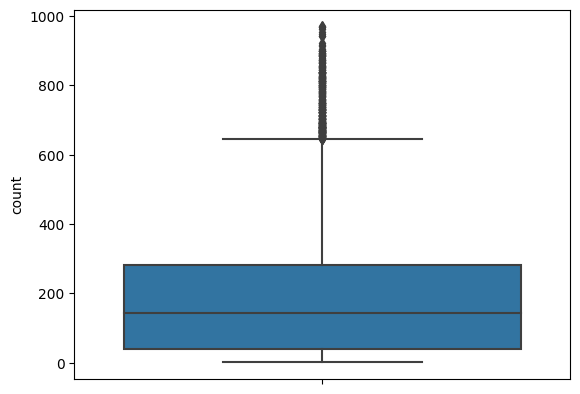

In [194]:
sns.boxplot(data=df_model,
            y = 'count')

Hitungan Total Pelanggan memiliki nilai 0 dan sebagian besar terpusat pada angka yang rendah (di bawah 300) dibandingkan rentang data (0-1000).
MAPE bisa besar karena pada nilai yang lebih rendah, persentase kesalahannya akan besar.
Kalau data aktualnya 2 dan prediksinya 10 maka 500%.

Jadi, kita harus mengubah target menjadi skala sensitif yang tidak nol.

**Count with Logarithmic transformer from Transformed Target Regressor**

In [80]:
from sklearn.compose import TransformedTargetRegressor

In [195]:
log_linreg = TransformedTargetRegressor(linreg, func=np.log1p, inverse_func=np.expm1)
log_knnreg = TransformedTargetRegressor(knnreg, func=np.log1p, inverse_func=np.expm1)
log_treereg = TransformedTargetRegressor(treereg, func=np.log1p, inverse_func=np.expm1)
log_rfreg = TransformedTargetRegressor(rfreg, func=np.log1p, inverse_func=np.expm1)
log_svreg = TransformedTargetRegressor(svreg, func=np.log1p, inverse_func=np.expm1)
log_xgbreg = TransformedTargetRegressor(xgbreg, func=np.log1p, inverse_func=np.expm1)
log_ridgereg = TransformedTargetRegressor(ridgereg, func=np.log1p, inverse_func=np.expm1)
log_lassoreg = TransformedTargetRegressor(lassoreg, func=np.log1p, inverse_func=np.expm1)
log_gradientreg = TransformedTargetRegressor(gradientreg, func=np.log1p, inverse_func=np.expm1)
logModel = [log_linreg,log_knnreg,log_treereg,log_svreg,log_rfreg,log_xgbreg,log_ridgereg,log_lassoreg,log_gradientreg]
logModelName = ['log_linreg','log_knnreg','log_treereg','log_svreg','log_rfreg','log_xgbreg','log_ridgereg','log_lassoreg','log_gradientreg']

Kami menggunakan func=np.log1p untuk mengubah Cnt menjadi logaritmik tetapi dengan +1 sebagai koefisiennya.
Jadi kita dapat mengisi Cnt dengan jangkauan yang lebih dekat tetapi bukan nol (karena +1).

Setelah itu, sebelum dilakukan evaluasi, data akan diubah kembali ke skala semula dengan inverse_func=np.expm1

TransformedTargetRegressor adalah wrapper atau meta-estimator yang memungkinkan transformasi variabel target sebelum menyesuaikan model regresi. Ini menerapkan fungsi yang ditentukan pengguna (seperti transformasi logaritmik atau eksponensial) ke variabel target selama pelatihan dan menerapkan fungsi invers selama prediksi.

Harapannya, dengan nilai yang bukan nol dan rentang data yang relatif dekat, MAPE bisa menjadi lebih baik.

<Axes: ylabel='count'>

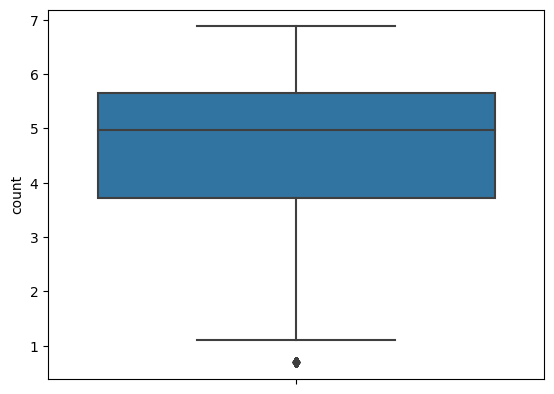

In [196]:
sns.boxplot(y = np.log1p(df_model['count']))

Ini adalah distribusi Cnt setelah diproses dengan TransformedTargetRegressor()

Sekarang, mari kita lakukan benchmark model atau validasi silang dengan bentuk baru Count.

In [197]:
listMAEall = []
listMAEmean = []
listMAEstd = []

listMAPEall = []
listMAPEmean = []
listMAPEstd = []

listMSEall = []
listMSEmean = []
listMSEstd = []

listRMSEall = []
listRMSEmean = []
listRMSEstd = []

for model in logModel :
    pipeModel = Pipeline([('prepro',transformer),
                          ('modeling', model)])
    cvScore = cross_validate(estimator=pipeModel,
                             X = x_train,
                             y = y_train,
                             cv = 5,
                             scoring=['neg_mean_absolute_error',
                                      'neg_mean_absolute_percentage_error',
                                      'neg_mean_squared_error',
                                      'neg_root_mean_squared_error'],
                             error_score='raise')
    listMAEall.append(cvScore['test_neg_mean_absolute_error'])
    listMAEmean.append(cvScore['test_neg_mean_absolute_error'].mean())
    listMAEstd.append(cvScore['test_neg_mean_absolute_error'].std())
    listMAPEall.append(cvScore['test_neg_mean_absolute_percentage_error'])
    listMAPEmean.append(cvScore['test_neg_mean_absolute_percentage_error'].mean())
    listMAPEstd.append(cvScore['test_neg_mean_absolute_percentage_error'].std())
    listMSEall.append(cvScore['test_neg_mean_squared_error'])
    listMSEmean.append(cvScore['test_neg_mean_squared_error'].mean())
    listMSEstd.append(cvScore['test_neg_mean_squared_error'].std())
    listRMSEall.append(cvScore['test_neg_root_mean_squared_error'])
    listRMSEmean.append(cvScore['test_neg_root_mean_squared_error'].mean())
    listRMSEstd.append(cvScore['test_neg_root_mean_squared_error'].std())

dfCVlog = pd.DataFrame()
dfCVlog['algo'] = logModelName
dfCVlog['MAEmean'] = listMAEmean
dfCVlog['MAEstd'] = listMAEstd
dfCVlog['MAEall'] = listMAEall
dfCVlog['MAPEmean'] = listMAPEmean
dfCVlog['MAPEstd'] = listMAPEstd
dfCVlog['MAPEall'] = listMAPEall
dfCVlog['MSEmean'] = listMSEmean
dfCVlog['MSEstd'] = listMSEstd
dfCVlog['MSEall'] = listMSEall
dfCVlog['RMSEmean'] = listRMSEmean
dfCVlog['RMSEstd'] = listRMSEstd
dfCVlog['RMSEall'] = listRMSEall
dfCVlog

,algo,MAEmean,MAEstd,MAEall,MAPEmean,MAPEstd,MAPEall,MSEmean,MSEstd,MSEall,RMSEmean,RMSEstd,RMSEall
0,log_linreg,-106.372762,1.824486,"[-105.21038738775238, -106.35071624708205, -10...",-1.418082,0.068039,"[-1.4819981880398287, -1.4192142630102327, -1....",-26123.286074,578.822051,"[-25950.75923508169, -26090.344125131844, -251...",-161.617016,1.796126,"[-161.09239347368853, -161.52505726707494, -15..."
1,log_knnreg,-62.153788,2.846126,"[-57.633598807521565, -62.3899708120468, -60.7...",-0.605414,0.046618,"[-0.5817460718604233, -0.5751451517326605, -0....",-10008.398043,731.044048,"[-8951.898516449939, -9846.016149418516, -9669...",-99.975289,3.652345,"[-94.61447308128888, -99.22709382733385, -98.3..."
2,log_treereg,-37.755350,0.883137,"[-36.343106995884774, -37.18621399176955, -38....",-0.396762,0.013125,"[-0.4075138326106932, -0.3892833395644522, -0....",-4114.064609,158.869916,"[-4111.456275720165, -3839.28086419753, -4259....",-64.128857,1.246745,"[-64.1206384537784, -61.961930765571935, -65.2..."
3,log_svreg,-134.064648,4.718463,"[-126.6883689388667, -133.79906325918506, -131...",-5.036162,0.333799,"[-5.363405836934723, -5.043831431985457, -5.44...",-34369.594064,3002.579811,"[-29893.438974898523, -34207.79607828461, -327...",-185.212212,8.125911,"[-172.89719192311517, -184.95349706962725, -18..."
4,log_rfreg,-29.482249,1.066394,"[-27.52219972804499, -29.846282142499422, -29....",-0.289172,0.011529,"[-0.2821457688165958, -0.2843022804213735, -0....",-2414.484398,137.129746,"[-2205.9019391008637, -2388.085599835639, -242...",-49.117629,1.393883,"[-46.96703034151578, -48.86804272564678, -49.2..."
5,log_xgbreg,-26.751401,1.846658,"[-24.016324618256387, -25.38211741810473, -27....",-0.253290,0.012435,"[-0.240367176272164, -0.24698072320437925, -0....",-2011.118947,350.525739,"[-1608.6735023809272, -1703.2273091177788, -21...",-44.679711,3.852580,"[-40.10827224377693, -41.27017457096321, -46.1..."
6,log_ridgereg,-106.379973,1.835667,"[-105.17588739287244, -106.3535642426186, -103...",-1.418871,0.068321,"[-1.482690727733468, -1.4203236545570086, -1.5...",-26116.896390,582.513805,"[-25925.411491220733, -26081.877790544368, -25...",-161.597121,1.807468,"[-161.0136997004315, -161.49884764463295, -158..."
7,log_lassoreg,-130.734139,5.188880,"[-122.30556800524622, -132.44877537175597, -12...",-2.128896,0.112297,"[-2.2014824693698336, -2.108468721246205, -2.3...",-36640.194200,2718.199200,"[-32792.15668274501, -36938.487494711204, -344...",-191.283750,7.121880,"[-181.08604773075425, -192.193879961645, -185...."
8,log_gradientreg,-56.259144,1.549543,"[-53.35626335024044, -57.51924392384632, -56.3...",-0.482721,0.022029,"[-0.4649602220656496, -0.48289439852721977, -0...",-8099.126710,300.972773,"[-7617.522990190772, -8395.843031950986, -8023...",-89.979505,1.677905,"[-87.27842224851898, -91.62883297276565, -89.5..."


Setelah melakukan TransformedTargetRegressor() pada Count, terdapat banyak peningkatan pada skor MAPE, bahkan MAE menjadi sedikit lebih baik.

Berdasarkan validasi silang di atas, kita dapat menyimpulkan bahwa
XGBRegressor() adalah model dasar terbaik dengan MAPE 25,3% dan MAE 26,7
diikuti oleh RandomForestRegressor() dengan 28,9% MAPE dan 29,4 MAE.

XGBRegressor:
XGBRegressor adalah implementasi kerangka peningkatan gradien yang disebut XGBoost. Ini membangun kumpulan model prediksi yang lemah, biasanya pohon keputusan, secara berurutan. Ini mengoptimalkan fungsi kerugian dengan meminimalkan kesalahan dan menambahkan model baru yang memperbaiki sisa model sebelumnya. XGBRegressor menawarkan akurasi prediksi yang tinggi, menangani hubungan yang kompleks, dan memiliki fitur-fitur canggih seperti regularisasi, menangani nilai yang hilang, dan pemrosesan paralel.

RandomForestRegressor:
RandomForestRegressor adalah metode pembelajaran ansambel yang membangun beberapa pohon keputusan dan menggabungkan prediksinya untuk membuat prediksi akhir. Setiap pohon keputusan dibangun berdasarkan subkumpulan fitur acak dan dilatih secara independen. RandomForestRegressor kuat terhadap overfitting, menangani hubungan non-linier, dan berkinerja baik pada data berdimensi tinggi. Ini memberikan ukuran kepentingan fitur, memungkinkan wawasan tentang kepentingan dan interpretasi variabel.

Kedua model ini cocok untuk tugas regresi dan memiliki kelebihannya masing-masing. XGBRegressor dikenal dengan teknik peningkatan gradiennya, yang mencapai akurasi tinggi dan menawarkan berbagai opsi lanjutan. RandomForestRegressor, di sisi lain, membangun kumpulan pohon keputusan, memberikan ketahanan terhadap overfitting dan kemudahan interpretasi melalui analisis kepentingan fitur. Pilihan di antara keduanya bergantung pada kebutuhan spesifik masalah, sifat data, dan keseimbangan antara akurasi, interpretabilitas, dan sumber daya komputasi.

**Hypertuning Top Base Model**

**XGBRegressor()**

Parameter di XGBRegressor() memiliki arti spesifik dan memengaruhi perilaku model XGBoost dengan cara yang berbeda:

1. max_depth mengontrol kedalaman maksimum setiap pohon keputusan dalam ansambel. Nilai yang lebih tinggi dapat membuat model menjadi lebih kompleks dan rentan terhadap overfitting, sedangkan nilai yang lebih rendah dapat meningkatkan generalisasi namun berpotensi melemahkan data.
2. learning_rate menentukan ukuran langkah pada setiap peningkatan iterasi. Nilai yang lebih kecil akan memperlambat pembelajaran namun dapat meningkatkan generalisasi, sedangkan nilai yang lebih besar dapat mempercepat pembelajaran namun meningkatkan risiko overfitting.
3. n_estimators menentukan jumlah pohon keputusan yang akan dibangun dalam ansambel. Nilai yang lebih tinggi memungkinkan model yang lebih kompleks dengan potensi performa yang lebih baik, namun juga meningkatkan biaya komputasi.
Dengan mengubah parameter berikut, Anda dapat memengaruhi perilaku dan performa model XGBoost:

Meningkatkan max_ depth dapat membuat model lebih ekspresif namun meningkatkan
risiko overfitting. Menurunkannya dapat meningkatkan generalisasi namun dapat menyebabkan underfitting.
Menyesuaikan learning_rate memungkinkan Anda mengontrol ukuran langkah selama penurunan gradien. Nilai yang lebih kecil memerlukan lebih banyak iterasi untuk menyatu namun dapat meningkatkan generalisasi.
Mengubah n_estimators mempengaruhi jumlah pohon keputusan dalam ansambel. Lebih banyak pohon dapat menangkap pola yang kompleks namun dapat menyebabkan waktu pelatihan lebih lama.

In [199]:
hyperParamXGB = {'model__regressor__max_depth': list(np.arange(2, 10)),
                 'model__regressor__learning_rate': list(np.arange(1, 101, 10)/100),
                 'model__regressor__n_estimators': list(np.arange(200, 301, 20))}

pipeXGB = Pipeline([('Preprocess', transformer),
                    ('model',log_xgbreg)])

gridSearchXGB = GridSearchCV(estimator = pipeXGB,
                             param_grid = hyperParamXGB,
                             cv = 5,
                             scoring = ['neg_mean_absolute_error',
                                        'neg_mean_absolute_percentage_error',
                                        'neg_mean_squared_error',
                                        'neg_root_mean_squared_error'],
                             refit = 'neg_mean_absolute_percentage_error')

gridSearchXGB.fit(x_train, y_train)
display(gridSearchXGB.best_estimator_,
        gridSearchXGB.best_params_,
        gridSearchXGB.best_score_,
        pd.DataFrame(gridSearchXGB.cv_results_).sort_values(['rank_test_neg_mean_absolute_percentage_error',
                                                               'rank_test_neg_mean_absolute_error']))

Pipeline(steps=[('Preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encodingOHE',
                                                  OneHotEncoder(),
                                                  ['weather', 'season',
                                                   'dayName'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=XGBRegressor(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   co...
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=0.11,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=6,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=300,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=None, ...)))])

{'model__regressor__learning_rate': 0.11,
 'model__regressor__max_depth': 6,
 'model__regressor__n_estimators': 300}

-0.23997336139266165

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__regressor__learning_rate,param_model__regressor__max_depth,param_model__regressor__n_estimators,params,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,...,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
77,0.404061,0.007953,0.024553,0.001343,0.11,6,300,"{'model__regressor__learning_rate': 0.11, 'mod...",-23.119385,-24.188167,...,137.633703,11,-39.041985,-38.623335,-42.515863,-42.313064,-41.973037,-40.893457,1.696725,10
76,0.731978,0.709067,0.028196,0.009036,0.11,6,280,"{'model__regressor__learning_rate': 0.11, 'mod...",-23.191934,-24.319683,...,133.987505,15,-39.175243,-38.850568,-42.553184,-42.469160,-42.014459,-41.012523,1.646144,15
75,0.354917,0.014800,0.022054,0.001233,0.11,6,260,"{'model__regressor__learning_rate': 0.11, 'mod...",-23.431783,-24.415728,...,127.319095,18,-39.436918,-39.076361,-42.688884,-42.471969,-42.038817,-41.142590,1.558211,18
119,1.098194,0.304048,0.049177,0.018763,0.21,5,300,"{'model__regressor__learning_rate': 0.21, 'mod...",-23.429493,-23.969869,...,179.493212,5,-39.175669,-37.327472,-41.615327,-43.116471,-42.818104,-40.810609,2.227101,5
74,0.328480,0.010125,0.021273,0.000999,0.11,6,240,"{'model__regressor__learning_rate': 0.11, 'mod...",-23.608402,-24.593966,...,126.189674,27,-39.680695,-39.379430,-42.838690,-42.672569,-42.428861,-41.400049,1.535352,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.461600,0.592942,0.014579,0.001419,0.01,2,280,"{'model__regressor__learning_rate': 0.01, 'mod...",-74.885694,-82.613073,...,1952.349787,476,-124.198448,-135.242306,-131.323187,-139.287990,-145.638403,-135.138067,7.234893,476
3,0.155956,0.009531,0.013517,0.000148,0.01,2,260,"{'model__regressor__learning_rate': 0.01, 'mod...",-76.123450,-83.853335,...,2016.139395,477,-126.170201,-137.331983,-133.454118,-141.748747,-147.887742,-137.318558,7.356007,477
2,0.155831,0.021460,0.015678,0.003662,0.01,2,240,"{'model__regressor__learning_rate': 0.01, 'mod...",-77.534740,-85.318611,...,2092.369127,478,-128.358607,-139.636701,-135.684128,-144.344859,-150.433551,-139.691569,7.503891,478
1,0.141785,0.011948,0.015135,0.004065,0.01,2,220,"{'model__regressor__learning_rate': 0.01, 'mod...",-78.994829,-86.931097,...,2159.248942,479,-130.630846,-142.107706,-138.169475,-147.040166,-152.980166,-142.185672,7.612321,479


XGBRegressor() mendapatkan peningkatan skor MAPE dan MAE.
dengan 23,5% MAPE dan 24 MAE

**Random Forest Regressor()**

Parameter di RandomForestRegressor() memiliki arti spesifik dan memengaruhi perilaku model Random Forest:

n_estimators menentukan jumlah pohon keputusan yang akan dibangun di hutan.

1. n_estimators menentukan jumlah pohon keputusan yang akan dibangun di hutan. Meningkatkan nilai dapat meningkatkan kinerja hingga titik tertentu, karena lebih banyak pohon memberikan ansambel yang lebih kuat. Namun, hal ini juga meningkatkan biaya komputasi.
2. max_depth menetapkan kedalaman maksimum setiap pohon keputusan. Nilai yang lebih tinggi dapat membuat pohon menjadi lebih kompleks dan rentan terhadap overfitting, sedangkan nilai yang lebih rendah dapat meningkatkan generalisasi namun berpotensi melemahkan data. Menggunakan None memungkinkan pohon untuk berkembang hingga semua daunnya murni atau mengandung jumlah sampel minimum.
3. min_samples_split menentukan jumlah minimum sampel yang diperlukan untuk memisahkan node internal. Meningkatkan nilai ini dapat mencegah overfitting dan menghasilkan pohon yang lebih sederhana, namun mungkin mengorbankan beberapa performa.
4. min_samples_leaf menetapkan jumlah minimum sampel yang diperlukan untuk berada di node daun. Mirip dengan min_samples_split, meningkatkan nilai ini dapat membantu mengontrol overfitting dan menghasilkan pohon yang lebih dapat digeneralisasikan.
5. max_features menentukan jumlah fitur yang perlu dipertimbangkan saat mencari pemisahan terbaik di setiap node. Menggunakan nilai float seperti 1.0 berarti mempertimbangkan semua fitur, sedangkan 'sqrt' mengacu pada akar kuadrat dari jumlah total fitur. Membatasi jumlah fitur dapat mengurangi korelasi antar pepohonan dan meningkatkan keanekaragaman.
6. bootstrap menentukan apakah sampel bootstrap harus digunakan saat membangun pohon. Menyetelnya ke True berarti menggunakan bootstrapping, yang menimbulkan keacakan dan dapat menghasilkan pohon yang lebih beragam.

Dengan menyetel parameter berikut, Anda dapat mengontrol perilaku dan performa model Random Forest:

* Menyesuaikan n_estimators dan max_ depth dapat memengaruhi kompleksitas hutan dan kemampuannya untuk menyesuaikan dengan data pelatihan.
* Memodifikasi min_samples_split dan min_samples_leaf dapat mengontrol kriteria penghentian pertumbuhan pohon dan mencegah overfitting.
* Mengubah max_features dan bootstrap mempengaruhi keacakan dan keragaman pohon dalam ansambel.




​

In [200]:
hyperParamRF = {'model__regressor__n_estimators': [100, 200, 300],
                'model__regressor__max_depth': [None, 5, 10],
                'model__regressor__min_samples_split': [2, 5, 10],
                'model__regressor__min_samples_leaf': [1, 2, 4],
                'model__regressor__max_features': [1.0, 'sqrt'],
                'model__regressor__bootstrap': [True, False]}

pipeRF = Pipeline([('Preprocess', transformer),
                    ('model',log_rfreg)])

randomSearchRF = RandomizedSearchCV(estimator = pipeRF,
                                     param_distributions = hyperParamRF,
                                     cv = 5,
                                     scoring = ['neg_mean_absolute_error',
                                                'neg_mean_absolute_percentage_error',
                                                'neg_mean_squared_error',
                                                'neg_root_mean_squared_error'],
                                     n_iter = 10,
                                     refit = 'neg_mean_absolute_percentage_error',
                                     random_state=99)

randomSearchRF.fit(x_train, y_train)
display(randomSearchRF.best_estimator_,
        randomSearchRF.best_params_,
        randomSearchRF.best_score_,
        pd.DataFrame(randomSearchRF.cv_results_).sort_values(['rank_test_neg_mean_absolute_percentage_error',
                                                               'rank_test_neg_mean_absolute_error']))

Pipeline(steps=[('Preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encodingOHE',
                                                  OneHotEncoder(),
                                                  ['weather', 'season',
                                                   'dayName'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=RandomForestRegressor(min_samples_leaf=2,
                                                                            n_estimators=200)))])

{'model__regressor__n_estimators': 200,
 'model__regressor__min_samples_split': 2,
 'model__regressor__min_samples_leaf': 2,
 'model__regressor__max_features': 1.0,
 'model__regressor__max_depth': None,
 'model__regressor__bootstrap': True}

-0.29992454444199534

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__regressor__n_estimators,param_model__regressor__min_samples_split,param_model__regressor__min_samples_leaf,param_model__regressor__max_features,param_model__regressor__max_depth,param_model__regressor__bootstrap,...,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
5,6.245887,0.443392,0.105891,0.001560,200,2,2,1.0,None,True,...,115.214873,1,-48.958596,-50.663433,-51.435429,-50.808412,-52.434999,-50.860174,1.137399,1
7,4.068381,0.417561,0.052152,0.001440,100,10,2,1.0,None,False,...,199.415129,2,-61.217818,-59.126771,-59.667455,-59.398014,-63.490717,-60.580155,1.626086,2
9,8.375483,0.545029,0.079799,0.003891,300,5,4,1.0,10,False,...,569.774662,3,-84.390250,-76.880507,-80.151150,-76.892077,-85.059693,-80.674735,3.521696,3
1,3.577063,0.404930,0.167618,0.009981,300,5,2,sqrt,None,False,...,820.322453,4,-84.160354,-90.100120,-88.160464,-91.944141,-97.800099,-90.433036,4.498422,4
2,1.456808,0.109413,0.082041,0.003089,200,5,4,sqrt,None,True,...,997.297826,5,-94.838092,-104.203415,-100.604269,-103.205550,-109.794417,-102.529149,4.876522,5
0,1.970671,0.377912,0.100695,0.015490,300,2,1,sqrt,10,True,...,1437.275039,7,-107.228105,-117.045830,-112.594150,-118.424959,-125.739030,-116.206415,6.166941,7
4,0.998525,0.006942,0.021783,0.000957,100,2,2,1.0,5,True,...,1318.103123,6,-107.886919,-115.794758,-112.870011,-117.979974,-124.956864,-115.897705,5.652511,6
8,2.006041,0.082599,0.090803,0.007046,300,5,4,sqrt,10,False,...,1449.550392,8,-107.045604,-117.768481,-113.936371,-118.581437,-126.075431,-116.681465,6.219702,8
6,0.545964,0.011481,0.034010,0.003824,100,2,4,sqrt,10,True,...,1499.578740,9,-109.014111,-118.050013,-114.209251,-118.489310,-128.202689,-117.593075,6.302774,9
3,4.349413,0.202431,0.052400,0.008883,300,5,2,1.0,5,False,...,1523.777027,10,-110.427651,-118.565085,-116.668353,-121.444541,-129.761525,-119.373431,6.327715,10


**Summary: XGBRegressor() vs Random Forest Regressor()**

In [201]:
listMAEmean = []
listMAEstd = []

listMAPEmean = []
listMAPEstd = []

listMSEmean = []
listMSEstd = []

listRMSEmean = []
listRMSEstd = []

tuned_xgbreg = gridSearchXGB.best_estimator_
tuned_rfreg = randomSearchRF.best_estimator_

baseModel = [log_xgbreg,
            log_rfreg]
tunedModel = [tuned_xgbreg,
              tuned_rfreg]

baseModelName = ['log_xgbreg',
                 'log_rfreg']
tunedModelName = ['tuned_xgbreg',
                  'tuned_rfreg']

for model in baseModel :
    pipeModel = Pipeline([('prepro',transformer),
                          ('modeling', model)])
    cvScore = cross_validate(estimator=pipeModel,
                             X = x_train,
                             y = y_train,
                             cv = 5,
                             scoring=['neg_mean_absolute_error',
                                      'neg_mean_absolute_percentage_error',
                                      'neg_mean_squared_error',
                                      'neg_root_mean_squared_error'],
                             error_score='raise' )
    listMAEmean.append(cvScore['test_neg_mean_absolute_error'].mean())
    listMAEstd.append(cvScore['test_neg_mean_absolute_error'].std())
    listMAPEmean.append(cvScore['test_neg_mean_absolute_percentage_error'].mean())
    listMAPEstd.append(cvScore['test_neg_mean_absolute_percentage_error'].std())
    listMSEmean.append(cvScore['test_neg_mean_squared_error'].mean())
    listMSEstd.append(cvScore['test_neg_mean_squared_error'].std())
    listRMSEmean.append(cvScore['test_neg_root_mean_squared_error'].mean())
    listRMSEstd.append(cvScore['test_neg_root_mean_squared_error'].std())

for model in tunedModel :
    cvScore = cross_validate(estimator=model,
                             X = x_train,
                             y = y_train,
                             cv = 5,
                             scoring=['neg_mean_absolute_error',
                                      'neg_mean_absolute_percentage_error',
                                      'neg_mean_squared_error',
                                      'neg_root_mean_squared_error'],
                             error_score='raise')
    listMAEall.append(cvScore['test_neg_mean_absolute_error'])
    listMAEmean.append(cvScore['test_neg_mean_absolute_error'].mean())
    listMAEstd.append(cvScore['test_neg_mean_absolute_error'].std())
    listMAPEall.append(cvScore['test_neg_mean_absolute_percentage_error'])
    listMAPEmean.append(cvScore['test_neg_mean_absolute_percentage_error'].mean())
    listMAPEstd.append(cvScore['test_neg_mean_absolute_percentage_error'].std())
    listMSEall.append(cvScore['test_neg_mean_squared_error'])
    listMSEmean.append(cvScore['test_neg_mean_squared_error'].mean())
    listMSEstd.append(cvScore['test_neg_mean_squared_error'].std())
    listRMSEall.append(cvScore['test_neg_root_mean_squared_error'])
    listRMSEmean.append(cvScore['test_neg_root_mean_squared_error'].mean())
    listRMSEstd.append(cvScore['test_neg_root_mean_squared_error'].std())



dfCVbest = pd.DataFrame()
dfCVbest['algo'] = baseModelName + tunedModelName
dfCVbest['MAEmean'] = listMAEmean
dfCVbest['MAEstd'] = listMAEstd
dfCVbest['MAPEmean'] = listMAPEmean
dfCVbest['MAPEstd'] = listMAPEstd
dfCVbest['MSEmean'] = listMSEmean
dfCVbest['MSEstd'] = listMSEstd
dfCVbest['RMSEmean'] = listRMSEmean
dfCVbest['RMSEstd'] = listRMSEstd
dfCVbest

,algo,MAEmean,MAEstd,MAPEmean,MAPEstd,MSEmean,MSEstd,RMSEmean,RMSEstd
0,log_xgbreg,-26.751401,1.846658,-0.253290,0.012435,-2011.118947,350.525739,-44.679711,3.852580
1,log_rfreg,-29.634314,1.028866,-0.291673,0.013135,-2452.630194,133.396637,-49.505890,1.340546
2,tuned_xgbreg,-24.623070,0.900458,-0.239973,0.011664,-1675.153670,137.633703,-40.893457,1.696725
3,tuned_rfreg,-30.391660,1.024676,-0.298940,0.014723,-2553.762737,103.453510,-50.524362,1.025484


Di sini, kami membandingkan semua versi model yang dipilih.
Kita dapat menyimpulkan bahwa versi XGBRegressor() yang di-hypertuned adalah model terbaik.

In [202]:
display(tuned_xgbreg,
        gridSearchXGB.best_params_)

Pipeline(steps=[('Preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encodingOHE',
                                                  OneHotEncoder(),
                                                  ['weather', 'season',
                                                   'dayName'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=XGBRegressor(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   co...
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=0.11,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=6,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=300,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=None, ...)))])

{'model__regressor__learning_rate': 0.11,
 'model__regressor__max_depth': 6,
 'model__regressor__n_estimators': 300}

Ini adalah model terbaik kami dalam format estimator, lengkap dengan kombinasi parameternya (berdasarkan seleksi hypertune)

Sekarang, mari kita uji ke kumpulan pengujian data untuk menemukan bahwa model terbaik kita dapat memprediksi data non-pelatihan dengan baik.

**Fit to Test Set**

Menyesuaikan model yang dipilih ke set pengujian memungkinkan kita mengevaluasi kinerjanya pada data yang tidak terlihat dan memverifikasi kemampuan generalisasinya.
Ini memberikan perkiraan yang tidak memihak tentang seberapa baik kinerja model dan membantu dalam pengambilan keputusan untuk penerapan atau peningkatan lebih lanjut.

In [203]:
tuned_xgbreg.fit(x_train,y_train)
y_pred = tuned_xgbreg.predict(x_test)
scoreAccTrain = tuned_xgbreg.score(x_train,y_train)
scoreMAPEtest = mean_absolute_percentage_error(y_test,y_pred)
scoreMAEtest = mean_absolute_error(y_test,y_pred)
scoreMSEtest = mean_squared_error(y_test,y_pred)
scoreRMSEtest = np.sqrt(mean_squared_error(y_test,y_pred))

dfTestScore = pd.DataFrame({'Model' : ['tuned_xgbreg'],
                           'scoreAccTrain' : [scoreAccTrain],
                           'scoreMAEtest' : [scoreMAEtest],
                           'scoreMAPEtest' : [scoreMAPEtest],
                           'scoreMSEtest' : [scoreMSEtest],
                           'scoreRMSEtest' : [scoreRMSEtest]})
dfTestScore

,Model,scoreAccTrain,scoreMAEtest,scoreMAPEtest,scoreMSEtest,scoreRMSEtest
0,tuned_xgbreg,0.977306,24.420781,0.231407,1549.648709,39.365578


Performa model terbaik adalah baik, karena MAPE pada set pengujian sedikit lebih baik dibandingkan pada pelatihan.
Kita dapat mengatakan bahwa XGBRegressor() yang disetel ini bagus dalam menangkap data di luar data train.

**Prediction: Visualization**

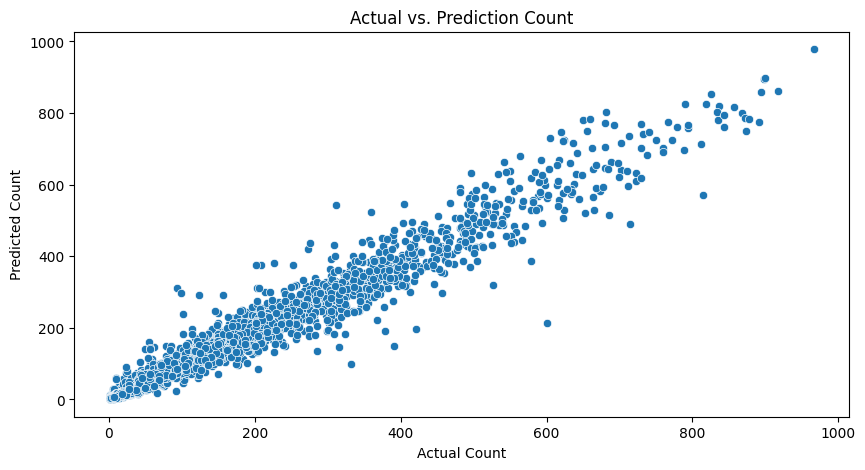

In [204]:
plt.figure(figsize=(10, 5))
plot = sns.scatterplot(x=y_test, y=y_pred).set(title='Actual vs. Prediction Count',
                                               xlabel='Actual Count',
                                               ylabel='Predicted Count')

Di sini kita dapat melihat bahwa prediksi tersebut menghasilkan pola regresi yang jelas. namun ada beberapa data yang overestimate/underestimate sehingga menjadikan MAPE cukup besar jika dibandingkan relatif dengan MAPE.

**Prediction: Residual Analysis**

Singkatnya, analisis dan visualisasi sisa memberikan wawasan tentang kinerja model, asumsi, outlier, dan area yang perlu ditingkatkan.

1. Analisis dan visualisasi sisa membantu menilai kualitas model regresi.
2. Plot sisa dapat mendeteksi outlier dan titik-titik berpengaruh.

In [205]:
residual = y_test - y_pred

dfResidual = pd.DataFrame({'y_pred': y_pred,
                           'residual': residual})

dfResidualFull = pd.DataFrame({'y_test': y_test,
                               'y_pred': y_pred,
                               'residual': residual})
display(dfResidualFull,
        dfResidual)

,y_test,y_pred,residual
6318,214,224.381653,-10.381653
7924,149,71.819405,77.180595
7586,20,20.957294,-0.957294
4772,124,140.642685,-16.642685
6095,190,181.477676,8.522324
...,...,...,...
11406,740,746.268188,-6.268188
3902,94,85.822121,8.177879
11204,367,295.361877,71.638123
2792,420,348.013855,71.986145


,y_pred,residual
6318,224.381653,-10.381653
7924,71.819405,77.180595
7586,20.957294,-0.957294
4772,140.642685,-16.642685
6095,181.477676,8.522324
...,...,...
11406,746.268188,-6.268188
3902,85.822121,8.177879
11204,295.361877,71.638123
2792,348.013855,71.986145


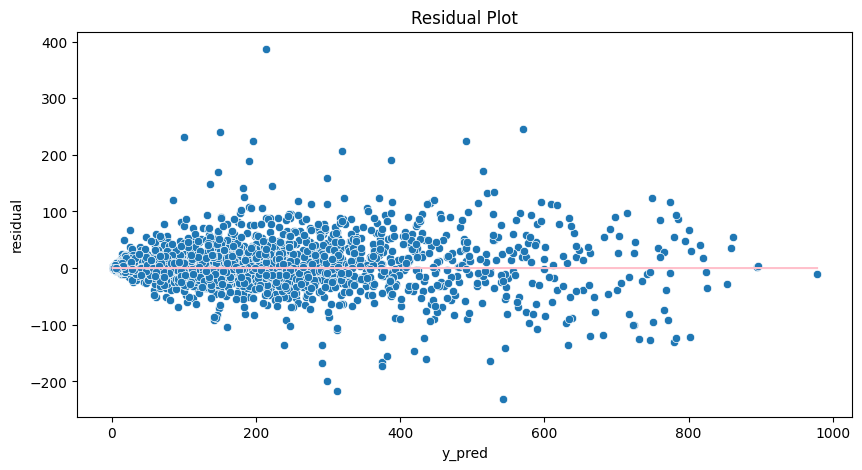

In [206]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=dfResidual, x='y_pred', y='residual')
sns.lineplot(data=dfResidual, x='y_pred', y=0, color='pink')
plt.title('Residual Plot')
plt.show()

Ada beberapa prediksi yang mempunyai selisih/sisa yang besar sehingga bila kita terapkan persentase, akan menghasilkan persentase yang besar, terutama pada jumlah total pelanggan yang rendah.
Namun jika dilihat pada MAE, hal ini menunjukkan konsistensi data prediksi yang baik dan relatif baik jika dibandingkan dengan data total pelanggan yang berkisar antara 0 hingga 1000.

**Feature Importances**

kepentingan fitur membantu dalam pemilihan fitur, interpretasi model, mendeteksi masalah data, dan mendorong rekayasa fitur untuk performa model dan pengambilan keputusan yang lebih baik.

Pentingnya fitur membantu memilih fitur yang relevan untuk meningkatkan performa model.
Analisis ini memberikan wawasan tentang faktor pendorong di balik prediksi model.
Kepentingan fitur membantu dalam menafsirkan dan menjelaskan model kepada pemangku kepentingan.
Mereka dapat menyoroti masalah data atau hubungan tak terduga antara fitur dan target.
Pentingnya fitur menginspirasi upaya rekayasa fitur untuk meningkatkan performa model.
Menganalisis pentingnya fitur mendukung proses pengambilan keputusan di seluruh alur pembelajaran mesin.

<Axes: title={'center': 'Feature Importances'}>

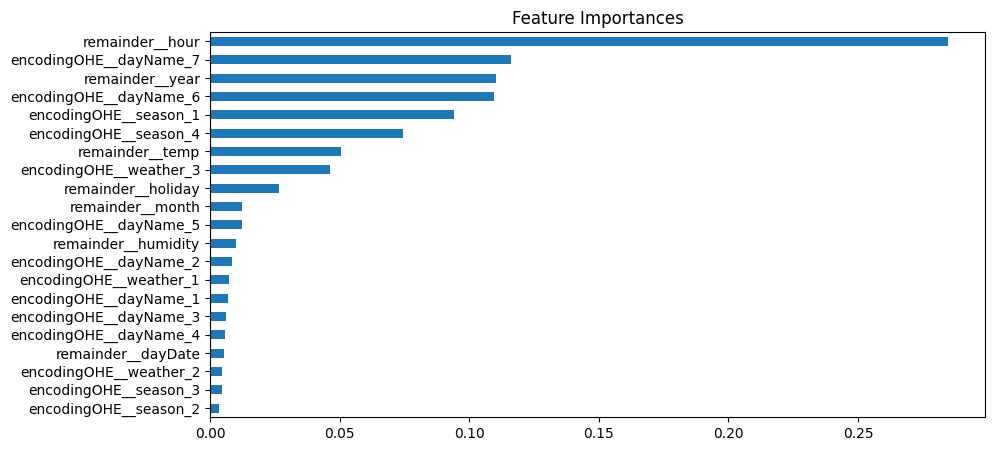

In [212]:
transformer.fit(x_train)
featureImp = pd.Series(tuned_xgbreg['model'].regressor_.feature_importances_, transformer.get_feature_names_out()).sort_values()
plt.figure(figsize=(10,5))
featureImp.plot(kind='barh', title='Feature Importances')

Dalam XGBRegressor()ini, fitur yang memiliki dampak terbesar terhadap total pelanggan adalah:

1. waktu sewa (jam)
2. dayName
3. Tahun
4. Musim
5. Temperatur
tahun
dan beberapa musim.
suhu

**Conclusion**

Berdasarkan skor benchmarking model, kita mendapatkan XGBRegressor() (dengan ~25,3% MAPE dan ~26,7 MAE) dan RandomForestRegressor() (dengan ~28,9% MAPE dan ~29,4MAE) sebagai model teratas.
Kemudian, kita melakukan penyetelan hyperparameter pada keduanya dan kami mendapatkan versi XGBRegressor() yang disetel sebagai model terbaik (dengan ~23,5% MAPE dan ~24 MAE).
Setelah memasukkannya ke dalam Test Set, menjadi lebih baik lagi dengan ~23% MAPE dan ~24,4 MAE. Artinya, model yang kita pilih bagus dalam memprediksi data di luar train set dan bisa baik/stabil dalam memprediksi data baru nantinya.
Rentang data train berkisar dari 1 total pelanggan hingga maksimal 970 total pelanggan, yang berarti model ini bagus dalam memprediksi data dalam rentang ini dan mungkin menjadi kurang akurat untuk memprediksi di luar data ini.
MAPE disini merupakan metrik utama yang digunakan dalam memilih model terbaik karena paling mudah diinterpretasikan oleh manusia.

Dalam model akhir ini berarti model tersebut dapat menebak total pelanggan dengan kesalahan sekitar ~23%. Tampaknya jumlah kesalahannya masih besar, tetapi kita dapat membenarkan model kita dengan melihat MAE, yang berarti bahwa model tersebut, berdasarkan nilai sebenarnya, meleset sekitar ~24,4 poin dari angka sebenarnya. Ini bisa menjadi persentase kesalahan yang besar jika kita memperkirakan jumlah total pelanggan yang rendah (jika sebenarnya 10 pelanggan, maka mungkin diprediksi sebanyak 33 pelanggan - persentase besar). Namun, jika kita memperkirakan jumlah total pelanggan yang tinggi, modelnya akan lebih akurat (jika jumlah pelanggan sebenarnya adalah 700 pelanggan, maka prediksinya adalah 723 pelanggan - persentasenya kecil).

Kembali lagi, MAPE masih cukup besar karena jumlah pelanggan yang rendah tidak dapat diprediksi seakurat jumlah pelanggan yang tinggi. Hal ini dikarenakan fitur yang dimiliki pada pemodelan ini terbatas dan dapat menimbulkan bias.

Jika melihat pada kepentingan fitur, kita dapat melihat bahwa waktu sewa (jam), status hari kerja, tahun, musim, dan temperature merupakan variabel utama yang membentuk prediksi. ini dapat memprediksi berdasarkan variabel-variabel tersebut untuk mendapatkan total pelanggan potensial dengan model ini. walaupun bukan fitur yang paling berdampak pada model.







**Recommendation**

hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

1. Model ini masih dapat diperbaiki untuk meminimalisir MAPE yang besar karena datanya terlihat lebih akurat dalam memprediksi angka yang lebih tinggi jika dibenarkan dengan MAE.
2. Kekuatan model ini dapat ditingkatkan dengan menggunakan model yang lebih kompleks
3. Model yang dipilih ini: Versi XGBRegressor(). Model ini lebih baik digunakan untuk memprediksi total pelanggan dalam rentang maksimal 1 pelanggan hingga 970 pelanggan.
4. Penambahkan lebih banyak variabel yang dapat mewakili lingkungan sehingga model dapat memprediksi lokasi/negara lain.

**Save Model**

In [215]:
#save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(x_train, y_train)

pickle.dump(estimator, open('data_bike_sharing.sav', 'wb'))

In [216]:
#Load model
filename = 'data_bike_sharing.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [217]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(x_test)))

41.52458475451874